In [72]:
import sys
sys.path.append("../src") 

from pipeline import *


In [73]:
# Importer le dataset
df = import_data("data.csv")

In [74]:
# Vérifier les types
check_column_types(df)

In [75]:
# Afficher les infos
affichage_info(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [76]:
# Afficher les statistiques descriptives
affichage_description(df)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2265.000258
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.350000,1400.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [77]:
# Voir les valeurs manquantes
print(isempty_count(df))

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [78]:
# Compter les doublons
print("Nombre de doublons :", count_duplicated(df))

Nombre de doublons : 0


In [79]:

df['TotalCharges'].fillna(df['TotalCharges'].mean(), inplace=True)
df.to_csv('../data/data.csv', index=False)

/tmp/ipykernel_188824/4266557886.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].mean(), inplace=True)


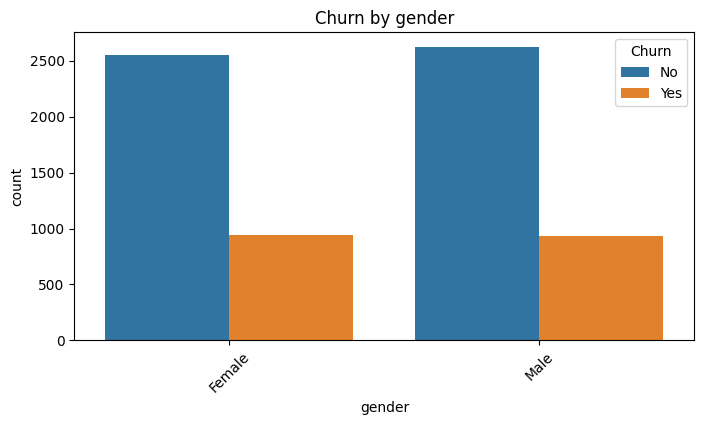

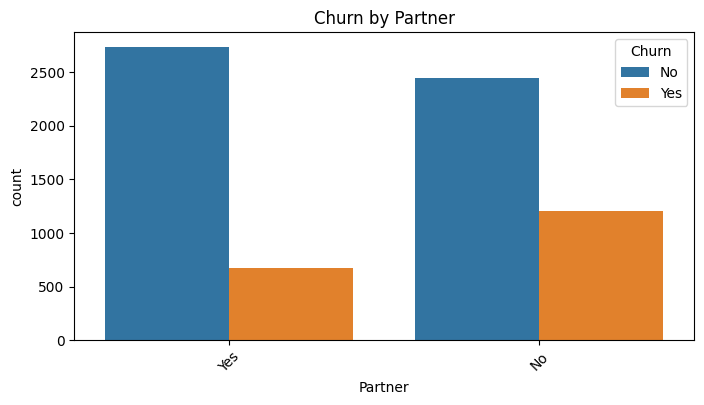

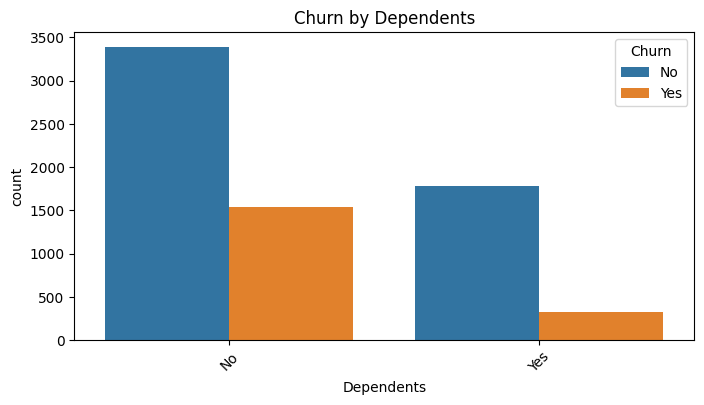

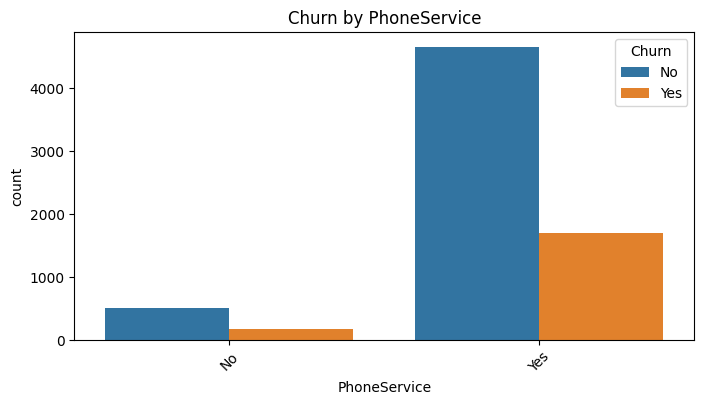

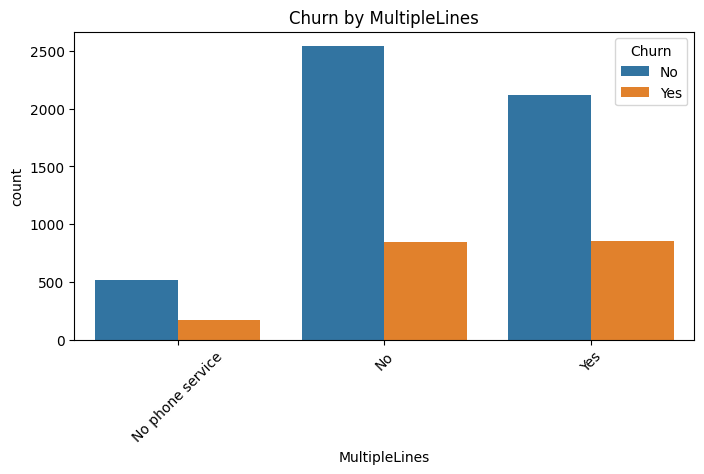

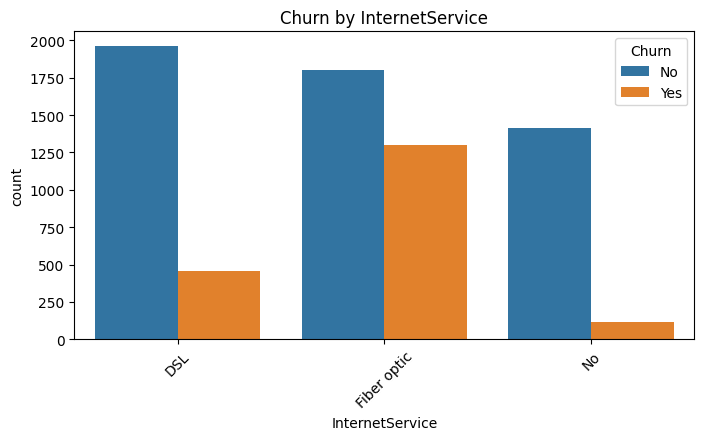

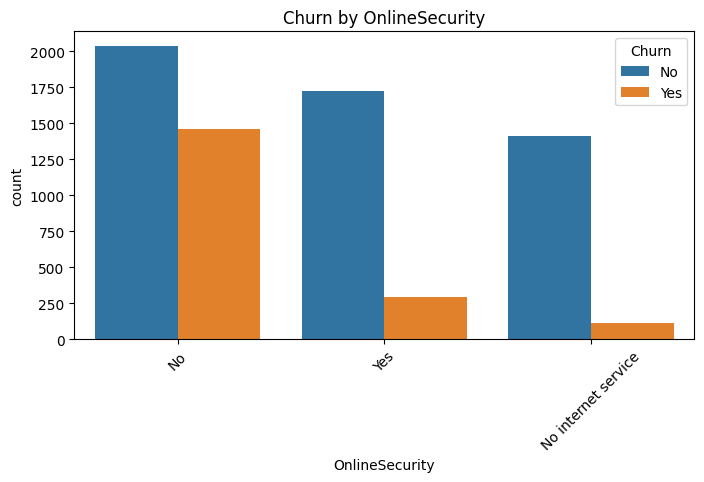

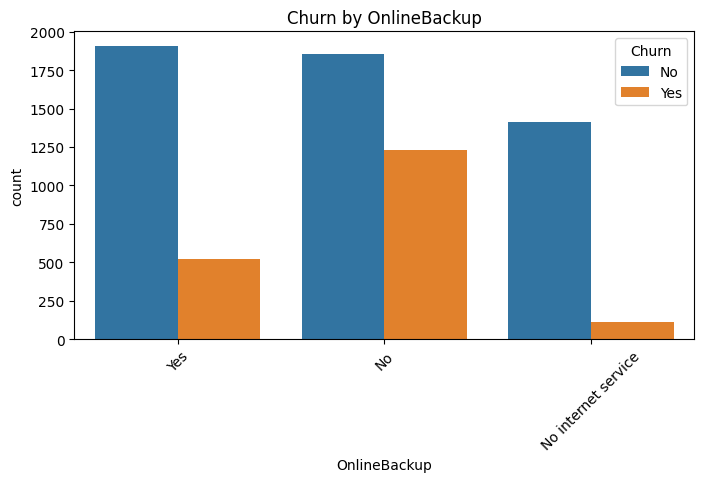

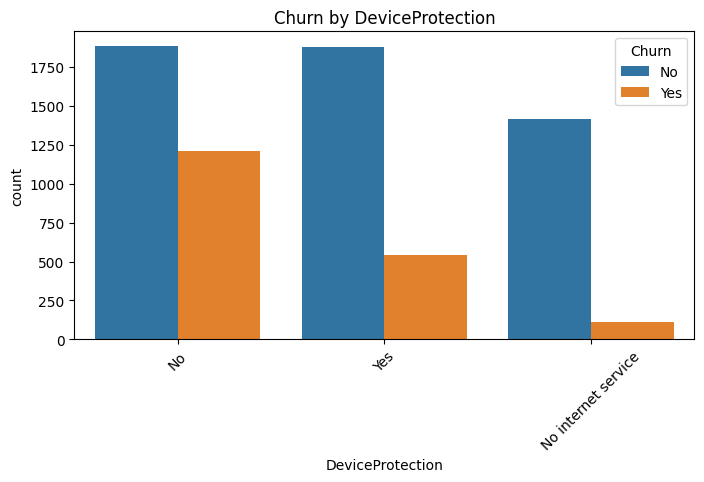

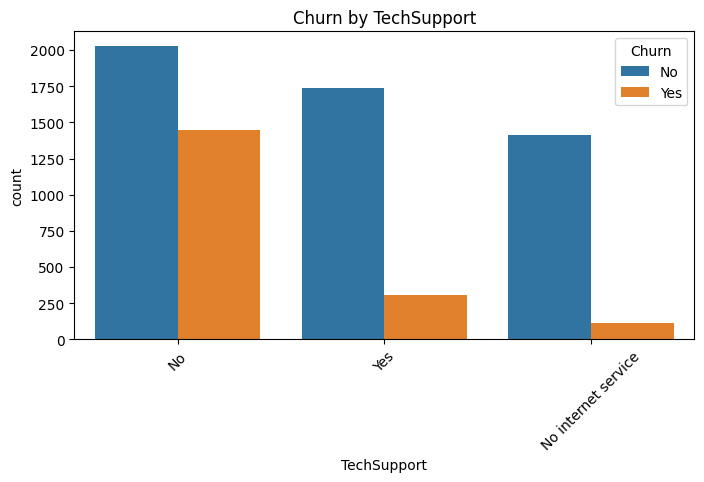

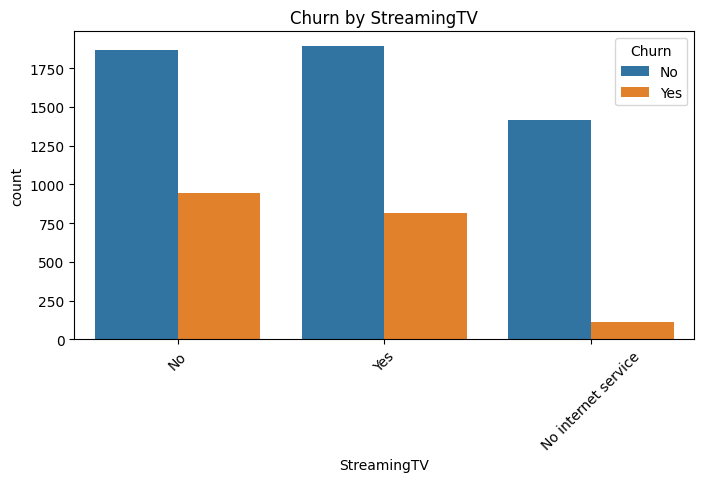

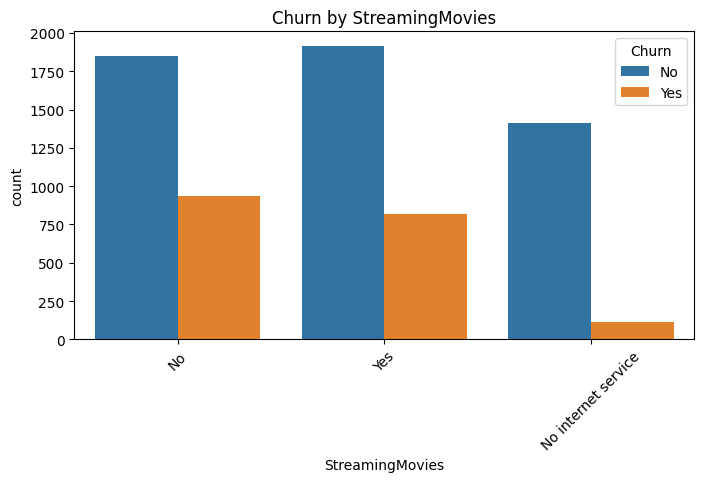

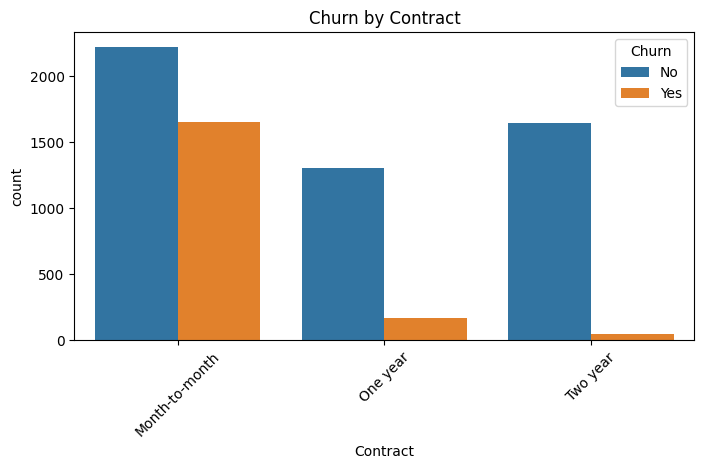

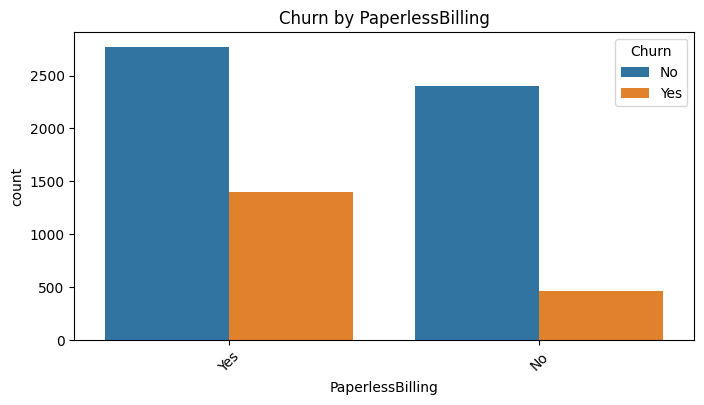

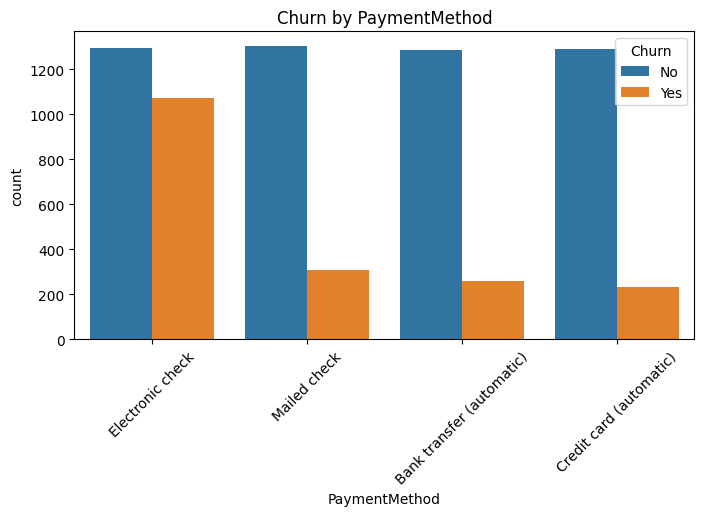

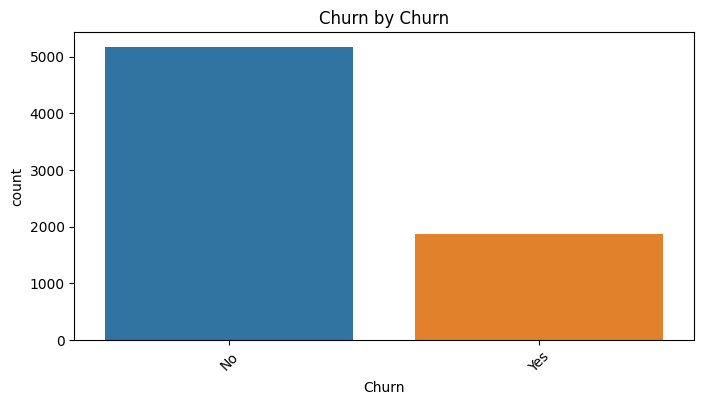

In [80]:
columns_to_plot = df.select_dtypes(include=['object']).columns.tolist()
columns_to_plot.remove('customerID') 


for col in columns_to_plot:
    count_plot_affichage(df,col)
    

In [81]:
num_columns = df.select_dtypes(include=['int64','float64']).copy()
num_columns['Churn'] = df["Churn"].map(lambda x: 0 if x == "No" else 1)
num_columns = num_columns.drop(columns=['SeniorCitizen'], errors='ignore')


num_columns 

,tenure,MonthlyCharges,TotalCharges,Churn
0,1,29.85,29.85,0
1,34,56.95,1889.50,0
2,2,53.85,108.15,1
3,45,42.30,1840.75,0
4,2,70.70,151.65,1
...,...,...,...,...
7038,24,84.80,1990.50,0
7039,72,103.20,7362.90,0
7040,11,29.60,346.45,0
7041,4,74.40,306.60,1


In [82]:
# Eencoder les colonnes catégorielles
cat_columns = df.select_dtypes(include=['object']).columns.tolist()



In [83]:
# Calculer la matrice de correlation
corr = num_columns.corr()

<Axes: >

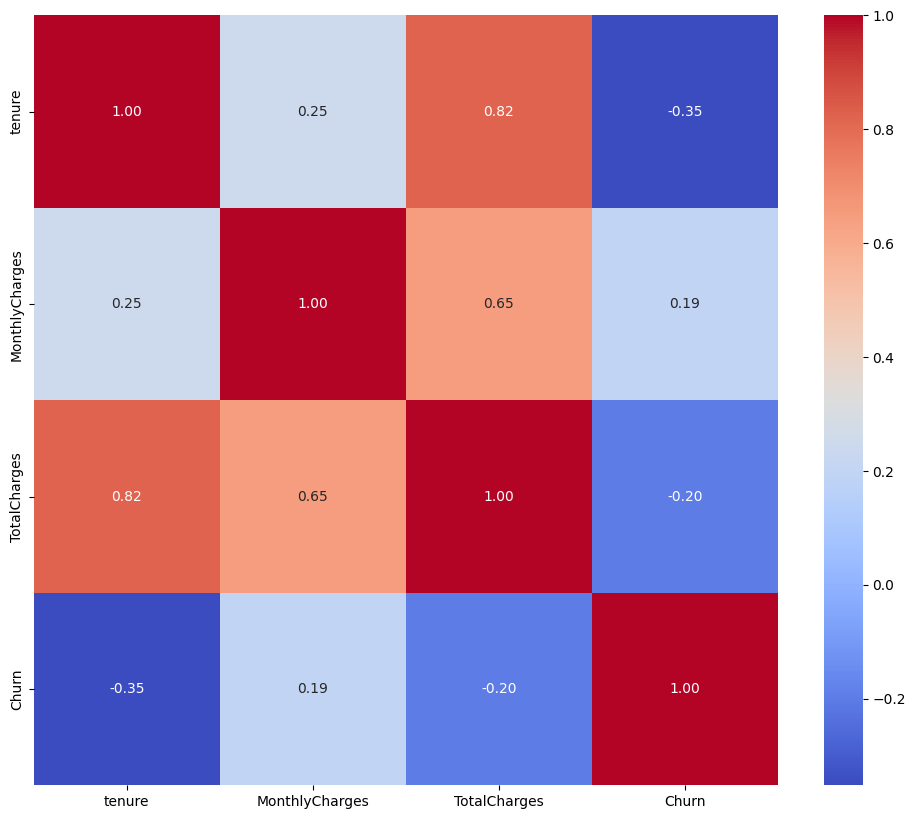

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")


In [85]:
# Encoder toutes les colonnes catégorielles
df_encoded = encode_categorical(df, cat_columns)

df_encoded.head()

TypeError: encode_categorical() takes 1 positional argument but 2 were given

In [ ]:
import pipeline 
from importlib import reload

reload(pipeline)


X = df[['tenure', 'MonthlyCharges', 'Contract', 'TechSupport', 'TotalCharges']]
y = df['Churn']

X = pipeline.encode_categorical(X)  

from sklearn.preprocessing import LabelEncoder

le_y = LabelEncoder()
y = le_y.fit_transform(y)

print(X.head())
print(y[:5])


   tenure  MonthlyCharges  Contract  TechSupport  TotalCharges
0       1           29.85         0            0         29.85
1      34           56.95         1            0       1889.50
2       2           53.85         0            0        108.15
3      45           42.30         1            2       1840.75
4       2           70.70         0            0        151.65
[0 0 1 0 1]


In [89]:
import pipeline
from importlib import reload
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

pipeline = reload(pipeline)

# Split train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalisation
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Liste des modèles
models = {
    "Logistic Regression": LogisticRegression(class_weight="balanced", max_iter=2000, random_state=42),
    "Random Forest": RandomForestClassifier(class_weight="balanced", n_estimators=100, random_state=42)
}

# Évaluation
for name, model in models.items():
    metrics = pipeline.evaluate_model(model, X_train, X_test, y_train, y_test)
    print(f"{name} Metrics:")
    print(metrics)
    print("-"*50)


Logistic Regression Metrics:
{'Accuracy': 0.7444996451383961, 'Recall': 0.8364611260053619, 'F1-Score': 0.6341463414634146}
--------------------------------------------------
Random Forest Metrics:
{'Accuracy': 0.7743080198722498, 'Recall': 0.48257372654155495, 'F1-Score': 0.5309734513274337}
--------------------------------------------------
